# Assignment No:2
Image and Video Prosessing 
Name : Ajinkya Waghulikar 
Neptun : FGRQTC 
Question : Thresholding algorithm by Otsu
Output: thresholded image and obtained threshold value.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

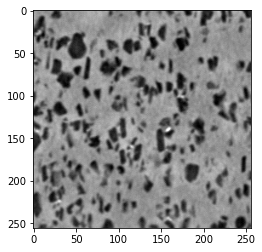

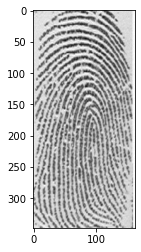

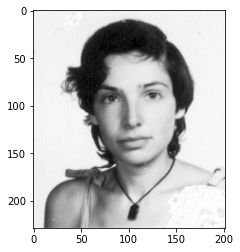

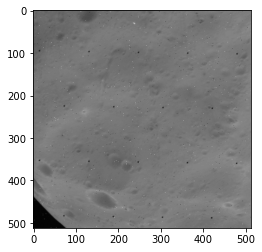

In [2]:
img = cv2.imread("aluminium.png", 0)
img1 = cv2.imread("finger.png", 0)
img2= cv2.imread("julia.png", 0)
img3= cv2.imread("phobos.png", 0)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(img3, cmap='gray')
plt.show()

In [3]:
threshold_value = {}
m = [1]


def create_Histogram(img):
   row, column = img.shape 
   a = np.zeros(256)
   for i in range(0,row):
      for j in range(0,column):
         a[img[i,j]] += 1
   b = np.arange(0,256)
   plt.bar(b, a, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return a


def regenerate_img(img, threshold):
    row, column = img.shape 
    a = np.zeros((row, column))
    for i in range(0,row):
        for j in range(0,column):
            if img[i,j] >= threshold:
                a[i,j] = 255
            else:
                a[i,j] = 0
    return a


   
def count_pixel(m):
    count = 0
    for i in range(0, len(m)):
        if m[i]>0:
           count += m[i]
    return count


def weight(s, e):
    a = 0
    for i in range(s, e):
        a += m[i]
    return a


def mean(s, e):
    a = 0
    b = weight(s, e)
    for i in range(s, e):
        a += m[i] * i
    
    return a/float(b)


def variance(s, e):
    a = 0
    b = mean(s, e)
    c = weight(s, e)
    for i in range(s, e):
        a += ((i - b) **2) * m[i]
    a /= c
    return a
            

def threshold(m):
    count = count_pixel(m)
    for i in range(1, len(m)):
        a = variance(0, i)
        b = weight(0, i) / float(count)
        c = mean(0, i)
        
        aa = variance(i, len(m))
        bb = weight(i, len(m)) / float(count)
        cc = mean(i, len(m))
        
        aaa = b * (a) + bb * (aa)
        bbb = b * bb * (c - cc)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('b='+ str(b) + "\n")
        fw.write('c='+ str(c) + "\n")
        fw.write('a='+ str(a) + "\n")
        
        fw.write('bb='+ str(bb) + "\n")
        fw.write('cc='+ str(cc) + "\n")
        fw.write('aa='+ str(aa) + "\n")

        fw.write('Within Class Variance='+ str(aaa) + "\n")
        fw.write('Between Class Variance=' + str(bbb) + "\n")
        fw.write("\n")
        
        if not math.isnan(aaa):
            threshold_value[i] = aaa


def get_optimal_threshold():
    min_aaa = min(threshold_value.values())
    optimal_threshold = [k for k, v in threshold_value.items() if v == min_aaa]
    print('Optimal threshold Value', optimal_threshold[0])
    return optimal_threshold[0]

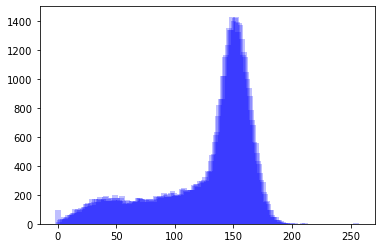

Optimal threshold Value 104


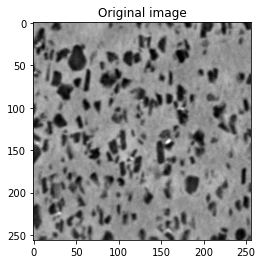

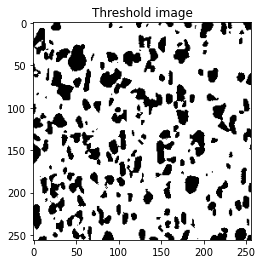

In [4]:
img00 = np.asarray(img)

m = create_Histogram(img00)
threshold(m)
op_thres = get_optimal_threshold()

res = regenerate_img(img00, op_thres)
plt.imshow(img, cmap='gray', vmax=255),plt.title('Original image')
plt.show()
plt.imshow(res, cmap='gray', vmax=255),plt.title('Threshold image')
plt.show()

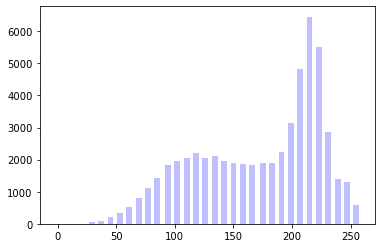

Optimal threshold Value 159


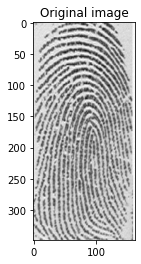

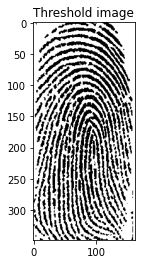

In [5]:
img11 = np.asarray(img1)

m = create_Histogram(img11)
threshold(m)
op_thres = get_optimal_threshold()

res = regenerate_img(img11, op_thres)
plt.imshow(img1, cmap='gray', vmax=255),plt.title('Original image')
plt.show()
plt.imshow(res, cmap='gray', vmax=255),plt.title('Threshold image')
plt.show()

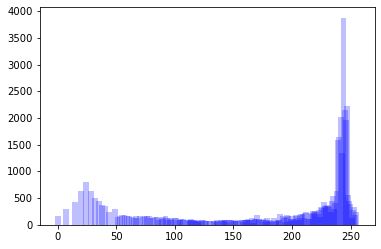

Optimal threshold Value 150


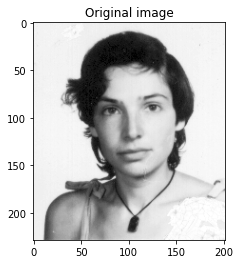

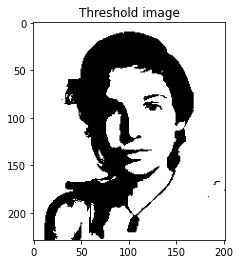

In [6]:
img22 = np.asarray(img2)

m = create_Histogram(img22)
threshold(m)
op_thres = get_optimal_threshold()

res = regenerate_img(img22, op_thres)
plt.imshow(img2, cmap='gray', vmax=255),plt.title('Original image')
plt.show()
plt.imshow(res, cmap='gray', vmax=255),plt.title('Threshold image')
plt.show()

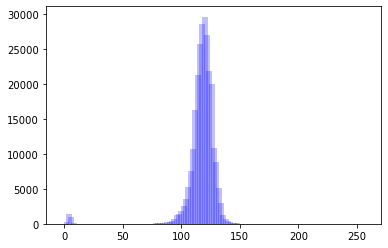

Optimal threshold Value 63


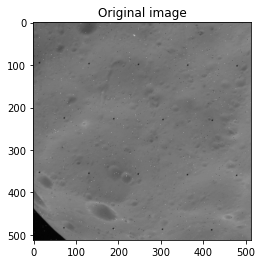

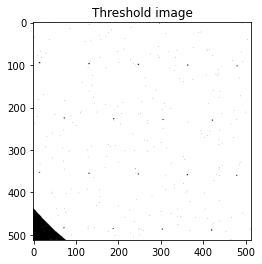

In [7]:
img33 = np.asarray(img3)

m = create_Histogram(img33)
threshold(m)
op_thres = get_optimal_threshold()

res = regenerate_img(img33, op_thres)
plt.imshow(img3, cmap='gray', vmax=255),plt.title('Original image')
plt.show()
plt.imshow(res, cmap='gray', vmax=255),plt.title('Threshold image')
plt.show()